In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [3]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source = 'yahoo', start='1995-1-1')['Adj Close']
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.261347,2.401030,4.242091,4.068810
1995-01-04,8.195127,2.418484,4.356228,4.068810
1995-01-05,8.079241,2.378592,4.318182,4.078781
1995-01-06,8.095792,2.418484,4.318182,4.058836
1995-01-09,8.062680,2.403525,4.394274,4.018948


In [4]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-09-02,140.509995,231.649994,6.95,6.44
2020-09-03,138.259995,217.300003,6.82,6.32
2020-09-04,137.960007,214.250000,6.90,6.42
2020-09-08,135.940002,202.660004,7.03,6.14
2020-09-09,138.149994,211.289993,6.97,6.16


# Normalization to 100

In [5]:
#the first row of the data
mydata.iloc[0]

PG      8.261347
MSFT    2.401030
F       4.242091
GE      4.068810
Name: 1995-01-03 00:00:00, dtype: float64

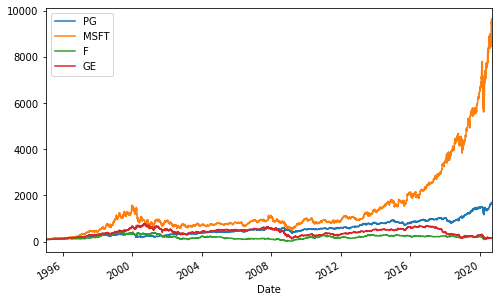

In [6]:
(mydata / mydata.iloc[0] * 100).plot(figsize=(8,5))

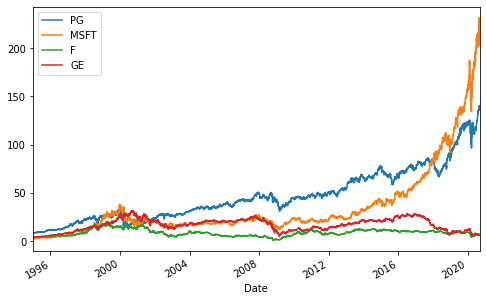

In [7]:
mydata.plot(figsize=(8,5))

# Calculate the return of the portfolio

In [9]:
returns = (mydata/mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [10]:
weights = np.array([0.25,0.25,0.25,0.25])
weights

array([0.25, 0.25, 0.25, 0.25])

In [11]:
np.dot(returns, weights)

array([        nan,  0.00653986, -0.00922966, ...,  0.00283683,
       -0.02337769,  0.01339078])

In [12]:
annual_returns = returns.mean()*250
annual_returns

PG      0.134689
MSFT    0.223272
F       0.098940
GE      0.066661
dtype: float64

In [13]:
np.dot(annual_returns, weights)

0.13089056607721414

In [16]:
portf_1 = str(round(np.dot(annual_returns, weights),2)*100) + ' %'
portf_1

'13.0 %'

In [17]:
weights_2 =np.array([0.4,0.4,0.15,0.05])
portf_2 = str(round(np.dot(annual_returns, weights_2),2)*100) + ' %'
portf_2

'16.0 %'